In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [3]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape to (samples, height, width, channels) and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Training set size: {x_train.shape[0]}")
print(f"Test set size: {x_test.shape[0]}")

Training set size: 60000
Test set size: 10000


In [4]:
# Define the ShallowNet model
model = Sequential([
    Conv2D(32, kernel_size=(10, 10), activation="relu", input_shape=(28, 28, 1)),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
opt = SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [5]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3979 - accuracy: 0.8882 - val_loss: 0.2019 - val_accuracy: 0.9435
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1716 - accuracy: 0.9516 - val_loss: 0.1328 - val_accuracy: 0.9605
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1187 - accuracy: 0.9666 - val_loss: 0.0927 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0948 - accuracy: 0.9733 - val_loss: 0.0814 - val_accuracy: 0.9763
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0813 - accuracy: 0.9771 - val_loss: 0.0667 - val_accuracy: 0.9809
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0724 - accuracy: 0.9793 - val_loss: 0.0632 - val_accuracy: 0.9816
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0653 - accuracy: 0.9820 - val_loss: 0.0605 - val_ac

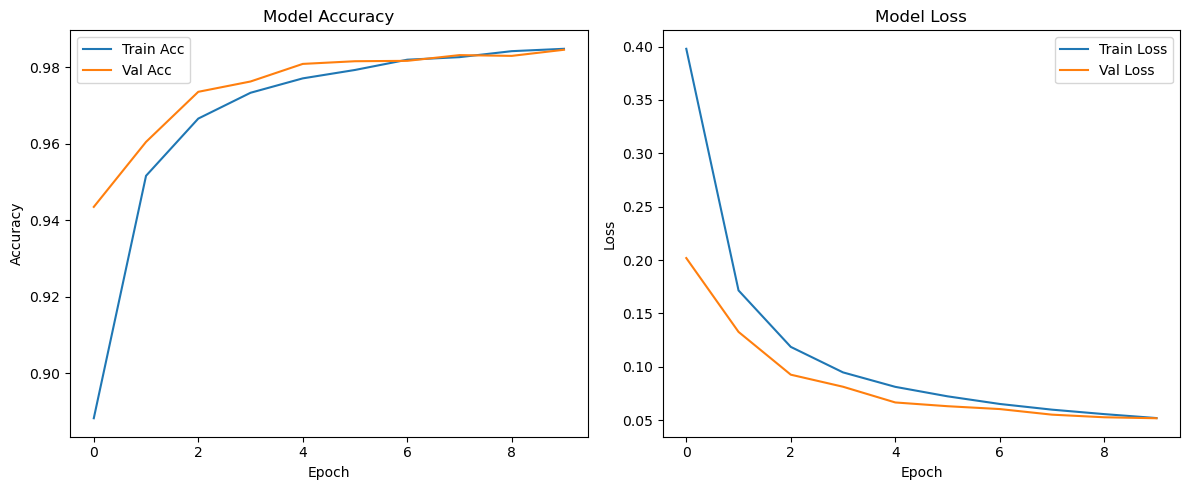

In [6]:
# Plot training accuracy and loss history
plt.figure(figsize=(12, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()